In [16]:
import numpy as np
from Grid import Grid 
from MesData import MesData
from Calkowanie import Calkowanie
from Calculation import Calculation

calkowanie = Calkowanie()
data_4_4 = MesData('Test1_4_4.txt').data
calkowanie.matrix4_4()
calcul = Calculation()
gr = Grid(data_4_4)

In [ ]:
from ParaviewFile import ParaviewFile

ParaviewFile(gr.data, gr.TempinTime).to_file('paraview_data')

In [ ]:
H_ = gr.H_glob + gr.C_glob/data_4_4['SimulationStepTime']
P_ = np.dot( gr.C_glob/data_4_4['SimulationStepTime'], np.array([100.0 for _ in range(16)])) + gr.P_glob

In [ ]:
temp = []
for t_del in range(1, int(data_4_4['SimulationStepTime'])+1):
    H_ = gr.H_glob + gr.C_glob/float(t_del)+1.0
    P_ = np.dot(gr.C_glob/float(t_del)+1.0, t0)+gr.P_glob
    t1 = np.linalg.solve(H_, -1*P_)
    temp.append(t1)
    t0 = t1

In [ ]:
data_4_4['InitialTemp']

In [ ]:
t0 = np.array([100.0 for _ in range(16)])
t_vector = []
H_ = gr.H_glob + gr.C_glob/float(data_4_4['SimulationStepTime'])
for _ in range( int( data_4_4['SimulationTime'] / data_4_4['SimulationStepTime'] ) ):
    P_ = np.dot(t0, gr.C_glob/float(data_4_4['SimulationStepTime']))+gr.P_glob
    t1 = np.linalg.solve(H_, P_)
    t_vector.append(t1)
    t0 = t1

In [ ]:
import numpy as np
from scipy.integrate import quadrature

# Определите вашу функцию, которую вы интегрируете
def integrand(x, y):
    return x**2 + y**2  # Пример: интегрируемая функция

# Задайте пределы интегрирования
x_lower, x_upper = -1, 1
y_lower, y_upper = -1, 1

# Задайте количество узлов для квадратуры
num_nodes = 3

# Получите узлы и веса интегрирования
nodes_x, weights_x = np.polynomial.legendre.leggauss(num_nodes)
nodes_y, weights_y = np.polynomial.legendre.leggauss(num_nodes)

# Вычислите узлы и веса для двумерной квадратуры
# nodes_combinations = np.array(np.meshgrid(nodes_x, nodes_y)).T.reshape(-1, 2)
# weights_combinations = np.outer(weights_x, weights_y).reshape(-1)

# # Выполните квадратуру
# result = 0.0
# for i in range(len(weights_combinations)):
#     x = 0.5 * (x_upper - x_lower) * nodes_combinations[i, 0] + 0.5 * (x_upper + x_lower)
#     y = 0.5 * (y_upper - y_lower) * nodes_combinations[i, 1] + 0.5 * (y_upper + y_lower)
#     result += integrand(x, y) * weights_combinations[i]

# # Умножьте результат на масштабирование области интегрирования
# result *= 0.25 * (x_upper - x_lower) * (y_upper - y_lower)

# print("Результат интегрирования:", result)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


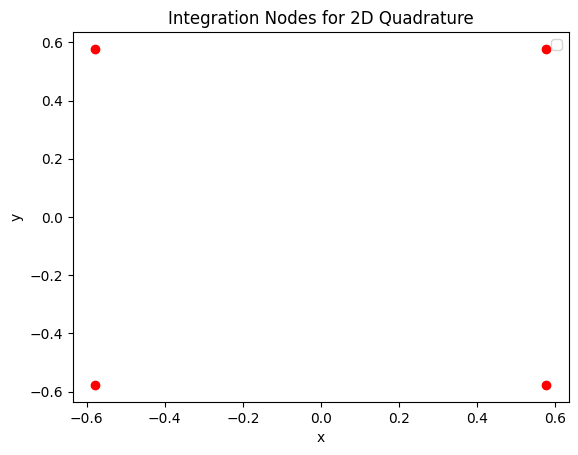

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quadrature

# Определите количество узлов для квадратуры
num_nodes = 2

# Получите узлы и веса интегрирования
nodes_x, weights_x = np.polynomial.legendre.leggauss(num_nodes)
nodes_y, weights_y = np.polynomial.legendre.leggauss(num_nodes)

# Создайте комбинацию узлов и весов для двумерной квадратуры
nodes_combinations = np.array(np.meshgrid(nodes_x, nodes_y)).T.reshape(-1, 2)
weights_combinations = np.outer(weights_x, weights_y).reshape(-1)

# Определите функцию, которую вы интегрируете
def integrand(x, y):
    return x**2 + y**2

# Задайте пределы интегрирования
x_lower, x_upper = -1, 1
y_lower, y_upper = -1, 1

# Создайте сетку для отображения интегрируемой функции
x_vals = np.linspace(x_lower, x_upper, 100)
y_vals = np.linspace(y_lower, y_upper, 100)
# X, Y = np.meshgrid(x_vals, y_vals)
# Z = integrand(X, Y)

# Постройте график функции и узлов интегрирования
# plt.contourf(X, Y, Z, cmap="viridis")
plt.scatter(nodes_combinations[:, 0], nodes_combinations[:, 1], color='red', marker='o')
plt.title('Integration Nodes for 2D Quadrature')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [49]:
nodes_combinations

array([[-0.57735027, -0.57735027],
       [-0.57735027,  0.57735027],
       [ 0.57735027, -0.57735027],
       [ 0.57735027,  0.57735027]])

In [ ]:
len(nodes_combinations)

In [ ]:
coll_nodes

In [ ]:
nodes_combinations[6:9]

In [ ]:
nodes_weight = np.zeros((len(nodes_combinations),3))
for i in range(len(nodes_combinations)):
    nodes_weight[i][0], nodes_weight[i][1] = nodes_combinations[i][0], nodes_combinations[i][1]
    nodes_weight[i][2] = weights_combinations[i]

In [ ]:
nodes_weight

In [ ]:
start = 0
step = 3
coll_nodes = []
for i in range(1, num_nodes+1):
    coll_nodes.append(nodes_weight[start:step*i])
    start+=step

In [ ]:
coll_nodes

In [ ]:
KsiEtaWeight = [[ []  for _ in range(num_nodes)] for _ in range(4)]
for i in range(4):
    for points in coll_nodes:
        for ind, point in enumerate(points):
            if i == 0:
                KsiEtaWeight[i][ind] = 

In [ ]:
import numpy as np

# Координаты узлов квадрата
x1, y1 = 0.0, 0.0
x2, y2 = 1.0, 0.0
x3, y3 = 1.0, 1.0
x4, y4 = 0.0, 1.0

# Гауссовы узлы и веса для квадратурной формулы с 4 точками
gauss_nodes = np.array([-np.sqrt(3)/3, np.sqrt(3)/3])
gauss_weights = np.array([1.0, 1.0])

# Проекция точек интегрирования на квадрат со сторонами 1x1
def project_to_square(xi, eta):
    # Проекция от (-1, -1) до (1, 1) на квадрат со сторонами 1x1
    x = 0.5 * (x1 * (1 - xi) + x2 * (1 + xi) + x3 * (1 + xi) + x4 * (1 - xi))
    y = 0.5 * (y1 * (1 - eta) + y2 * (1 - eta) + y3 * (1 + eta) + y4 * (1 + eta))
    return x, y

# Проекция и вывод результатов
for xi, weight_xi in zip(gauss_nodes, gauss_weights):
    for eta, weight_eta in zip(gauss_nodes, gauss_weights):
        x, y = project_to_square(xi, eta)
        print(f"Точка интегрирования: xi={xi}, eta={eta}")
        print(f"Проекция на квадрат: x={x}, y={y}")
        print("Вес интегрирования:", weight_xi * weight_eta)
        print("\n")


In [ ]:
def new_ksi(x_y_w):
    pass

In [ ]:
for i in range(4):
    nodes_weight 

In [ ]:
def pc_by_number(number):
    nodes_x, weights_x = np.polynomial.legendre.leggauss(number)
    nodes_y, weights_y = np.polynomial.legendre.leggauss(number)
    nodes_combinations = np.array(np.meshgrid(nodes_x, nodes_y)).T.reshape(-1, 2)
    weights_combinations = np.outer(weights_x, weights_y).reshape(-1)

In [ ]:
import math
import numpy as np

class Calkowanie2:
    def __init__(self):
        self.wagi = { i: sorted(self.get_weight()[i], key=lambda x: x['point']) for i in range(1,6) }
        self.dNdKsi4_4 = [[0.0 for _ in range(4)] for _ in range(4)]
        self.dNdEta4_4 = [[0.0 for _ in range(4)] for _ in range(4)]
        self.dNdKsi9_4 = [[0.0 for _ in range(4)] for _ in range(9)]
        self.dNdEta9_4 = [[0.0 for _ in range(4)] for _ in range(9)]
        self.default_x_y = {'x': [0, 0.025, 0.025, 0], 'y':[0,0,0.025, 0.025]}
        self.det_j = 6400

    def get_weight(self):
        return {1: [ {'point': 0, 'weight': 2} ], 
         2: [ {'point': num*((1/3.0)**(1/2)), 'weight':1 } for num in [-1,1]],
         3: [ {'point': 0, 'weight': 8/9.0 },
              {'point': -1*((3/5.0)**(1/2)), 'weight': 5/9.0 },
              {'point': ((3/5.0)**(1/2)), 'weight': 5/9.0 }
             ],
        4: [[ {'point': num*( (3/7.0 - 2/7.0*(6/5.0)**(1/2) )**(1/2) ) , 'weight': (18+30**1/2)/36} for num in [-1,1]] 
        + [ {'point': num*( (3/7.0 + 2/7.0*(6/5.0)**(1/2) )**(1/2) ) , 'weight': (18-30**1/2)/36} for num in [-1,1] ]][0],
        5: [{'point': 0, 'weight': 128/225}] 
        + [[ {'point': num*1/3*( (5-2*(10/7)**(1/2)))**(1/2), 'weight': (322+13*(70**(1/2)))/900}  for num in [-1,1] ] 
            + [ {'point': num*1/3*( (5+2*(10/7)**(1/2)))**(1/2), 'weight': (322-13*(70**(1/2)))/900}  for num in [-1,1] ]][0]}
    
    def gauss_1d_integration(self, f, points):
        integral = sum( node['weight']  * f(node['point']) for node in self.wagi[points])
        return integral

    def gauss_2d_integration(self, f, points):
        nodes_x = self.wagi[points]
        nodes_y = self.wagi[points]
        integral = sum(node_x['weight'] * node_y['weight'] * f(node_x['point'], node_y['point']) for node_x in nodes_x for node_y in nodes_y)
        return integral

    def f(self, x):
        return (1/4)*(1-x)

    def ksi(self, ksi):
        ksis = []
        a = 1
        b = 1
        for i in range(4):
            a = -1 if i in [0,3] else 1
            b = -1 if i in [0,1] else 1
            ksis.append( a*0.25 * (1 + (b*ksi)) )
        return ksis

    def eta(self, eta):
        etas = []
        a = 1
        b = 1
        for i in range(4):
            a = -1 if i in [0,1] else 1
            b = -1 if i in [0,3] else 1
            etas.append( a*0.25 * (1 + (b*eta)) )
        return etas
    
    def nodes_point(self):
        points = [
            (-1 / math.sqrt(3), -1 / math.sqrt(3)),
            (1 / math.sqrt(3), -1 / math.sqrt(3)),
            (1 / math.sqrt(3), 1 / math.sqrt(3)),
            (-1 / math.sqrt(3), 1 / math.sqrt(3))
            ]
        return points
    
    def PC(self):
        pc = [
            [[-1/math.sqrt(3), -1], [1/math.sqrt(3), -1]],
            [[1, -1/math.sqrt(3)], [1, 1/math.sqrt(3)]],
            [[1/math.sqrt(3), 1], [-1/math.sqrt(3), 1]],   
            [[-1, 1/math.sqrt(3)], [-1, -1/math.sqrt(3)]],
            ]
        # pc = [ [-1/math.sqrt(3), -1],  #11
        #        [1/math.sqrt(3), -1],   #12
        #        [1, -1/math.sqrt(3)],   #21
        #        [1, 1/math.sqrt(3)],    #22
        #        [1/math.sqrt(3), 1],    #31
        #        [-1/math.sqrt(3), 1],   #32
        #        [-1, 1/math.sqrt(3)],     #41
        #        [-1, -1/math.sqrt(3)]   #42 
        # ]
        return pc

    def N_range(self, pc):
        """
        pc => [ksi, eta]
        n_range => [N1, N2, N3, N4]
        """
        n_range = [
            0.25*(1-pc[0])*(1-pc[1]),
            0.25*(1+pc[0])*(1-pc[1]),
            0.25*(1+pc[0])*(1+pc[1]),
            0.25*(1-pc[0])*(1+pc[1]),
        ]
        return np.array(n_range)
    
    def N_range_eta(self, ):
        N_range = []
        for node in self.nodes_point():
            eta = node[0]
            N_range.append( [ -0.25 * (1 - eta ),
                              -0.25 * (1 + eta ),
                               0.25 * (1 + eta ),
                               0.25 * (1 - eta )] )
            
        return N_range
    
    def Hbc(self, N_ranges, alfa, det):
        """
        N_range => [[N1,N2,N3,N4],.... ] dla punktów calkowania
        """
        matrix_sum =sum([np.dot(mat.reshape(4,1), mat.reshape(1,4))  for mat in N_ranges ])
        return alfa * matrix_sum * det
    
    def P_vec(self, N_ranges, t_ot, alfa, det):
        """
        N_ranges => [[N1,N2,N3,N4],.... ] dla punktów calkowania
        t_ot => temperatura otoczenia
        """
        matrix_sum = sum( [mat.reshape(4,1) * t_ot for mat in N_ranges] )
        return alfa * matrix_sum * det

    def matrix4_4(self):
        for i in range(4):
            ksi = self.ksi(self.nodes_point()[i][0])
            eta = self.eta(self.nodes_point()[i][1])
            print(ksi, eta)
            for j in range(4):
              self.dNdKsi4_4[i][j] = ksi[j]
              self.dNdEta4_4[i][j] = eta[j]  

        self.dNdKsi4_4[1], self.dNdKsi4_4[-1] = self.dNdKsi4_4[-1], self.dNdKsi4_4[1]
        self.dNdEta4_4[1], self.dNdEta4_4[2] = self.dNdEta4_4[2], self.dNdEta4_4[1]
    
    def nodes_point9_4(self):
        points = [
                [-math.sqrt(3.0 / 5.0), -math.sqrt(3.0 / 5.0)],
                [0, -math.sqrt(3.0 / 5.0)],
                [math.sqrt(3.0 / 5.0), -math.sqrt(3.0 / 5.0)],
                [-math.sqrt(3.0 / 5.0), 0],
                [0, 0],
                [math.sqrt(3.0 / 5.0), 0],
                [-math.sqrt(3.0 / 5.0), math.sqrt(3.0 / 5.0)],
                [0, math.sqrt(3.0 / 5.0)],
                [math.sqrt(3.0 / 5.0), math.sqrt(3.0 / 5.0)]
                ]
        return points

    def matrix9_4(self):
        for i in range(9):
            for j in range(4):
                # pdb.set_trace()
                ksi = self.ksi(self.nodes_point9_4()[i][0])
                eta = self.eta(self.nodes_point9_4()[i][1])
                self.dNdEta9_4[i][j] = eta[j]
                self.dNdKsi9_4[i][j] = ksi[j]

    def matrix_dx_dksi_dyd_ksi(self, x,y, pc):
        self.matrix4_4()
        dy_dKsi = sum([ self.dNdKsi4_4[pc][i]* y[i] for i in range(len(y))])
        dx_dKsi = sum([ self.dNdKsi4_4[pc][i]* x[i] for i in range(len(y))])
        dy_dEta = sum([ self.dNdEta4_4[pc][i]* y[i] for i in range(len(y))])
        dx_dEta = sum([ self.dNdEta4_4[pc][i]* x[i] for i in range(len(y))])
        return [[dy_dEta, -1 * dy_dKsi ], [-1*dx_dEta, dx_dKsi]]
    
    def init_dNdx_dNdy(self, x, y):
        self.dNdx = []
        self.dNdy = []
        j_matrix =  [ self.matrix_dx_dksi_dyd_ksi(x,y, i) for i in range(4)]
        for j_ind, matJ in enumerate(j_matrix):
            x = []
            y = []
            det_j = 1 / np.linalg.det(matJ) # type: ignore
            for ksi, eta in zip( np.array(self.dNdKsi4_4[j_ind]), np.array(self.dNdEta4_4[j_ind]) ):
                ksi_eta = np.array([ksi, eta]).reshape(2,1)
                prom_res = det_j * np.dot(matJ, ksi_eta) # type: ignore
                x.append(prom_res[0][0])
                y.append(prom_res[1][0])
            self.dNdx.append(x)
            self.dNdy.append(y)

    def mat_dN_dx(self, x, y, det):
        self.matrix4_4()
        self.init_dNdx_dNdy(x, y)
        return self.dNdx
    
    def mat_dN_dy(self, x, y, det):
        self.matrix4_4()
        self.init_dNdx_dNdy(x, y)
        return self.dNdy
    
    def H_pc_N(self, x, y, det, N, k_t, dV):
        dN_dx =  np.array( self.mat_dN_dx(x, y, det))
        dN_dy = np.array( self.mat_dN_dy(x,y, det))
        H = np.dot( dN_dx[N].reshape(4,1), dN_dx[N].reshape(1,4) ) + np.dot( dN_dy[N].reshape(4,1), dN_dy[N].reshape(1,4) )
        return k_t * H * dV

    def detJ(matrix):
        np_matrix = np.array(matrix)
        return 1/np.linalg.det(np_matrix)
    
    def invMatrix(self, matrix):
        return np.linalg.inv(matrix)

    def print_matrix(matrix):
        for i in range(len(matrix)): # type: ignore
            print(", ".join( map(str, matrix[i]))) # type: ignore

In [ ]:
c2 = Calkowanie2()

In [ ]:
c2.matrix9_4()

In [ ]:
import numpy as np

# Определите количество узлов для квадратного элемента
num_nodes = 4

# Получите узлы и веса интегрирования
nodes_xi, weights_xi = np.polynomial.legendre.leggauss(num_nodes)
nodes_eta, weights_eta = np.polynomial.legendre.leggauss(num_nodes)

# Создайте комбинацию узлов и весов для двумерной квадратурной формулы
nodes_combinations = np.array(np.meshgrid(nodes_xi, nodes_eta)).T.reshape(-1, 2)
weights_combinations = np.outer(weights_xi, weights_eta).reshape(-1)

# Проецируйте значения точек интегрирования на оси xi и eta
projected_xi = nodes_combinations[:, 0]
projected_eta = nodes_combinations[:, 1]

# Выведите значения xi и eta
print("Значения xi:", projected_xi)
print("Значения eta:", projected_eta)


In [ ]:
c2.matrix4_4()

In [33]:
import numpy as np

# Определите количество узлов для квадратного элемента
num_nodes = 2

# Получите узлы и веса интегрирования
nodes_xi, weights_xi = np.polynomial.legendre.leggauss(num_nodes)
nodes_eta, weights_eta = np.polynomial.legendre.leggauss(num_nodes)

# Создайте комбинацию узлов и весов для двумерной квадратурной формулы
nodes_combinations = np.array(np.meshgrid(nodes_xi, nodes_eta)).T.reshape(-1, 2)
weights_combinations = np.outer(weights_xi, weights_eta).reshape(-1)

# Проецируйте значения точек интегрирования на оси xi и eta
projected_xi = nodes_combinations[:, 0]
projected_eta = nodes_combinations[:, 1]

# Выведите значения xi и eta
print("Значения xi:", projected_xi)
print("Значения eta:", projected_eta)


Значения xi: [-0.57735027 -0.57735027  0.57735027  0.57735027]
Значения eta: [-0.57735027  0.57735027 -0.57735027  0.57735027]


In [ ]:
nodes_combinations

In [ ]:
gr.grid[0][0].x, gr.grid[0][0].y

In [ ]:
import numpy as np

# Координаты узлов квадратного элемента
x1, y1 = 0.100000001, 0.00499999989
x2, y2 = 0.0666666701, 0.00499999989
x3, y3 = 0.0666666701,  -0.0283333343
x4, y4 = 0.100000001, -0.0283333343

# Гауссовы узлы и веса для квадратурной формулы с 4 точками
gauss_nodes, gauss_weights = np.polynomial.legendre.leggauss(2)

# gauss_weights = np.array([1.0, 1.0])

# Матрица Якобиана
def jacobian_matrix(xi, eta):
    N1 = 0.25 * (1 - xi) * (1 - eta)
    N2 = 0.25 * (1 + xi) * (1 - eta)
    N3 = 0.25 * (1 + xi) * (1 + eta)
    N4 = 0.25 * (1 - xi) * (1 + eta)

    dN1_dxi = -0.25 * (1 - eta)
    dN2_dxi = 0.25 * (1 - eta)
    dN3_dxi = 0.25 * (1 + eta)
    dN4_dxi = -0.25 * (1 + eta)

    dN1_deta = -0.25 * (1 - xi)
    dN2_deta = -0.25 * (1 + xi)
    dN3_deta = 0.25 * (1 + xi)
    dN4_deta = 0.25 * (1 - xi)

    dx_dxi = x1*dN1_dxi + x2*dN2_dxi + x3*dN3_dxi + x4*dN4_dxi
    dx_deta = x1*dN1_deta + x2*dN2_deta + x3*dN3_deta + x4*dN4_deta
    dy_dxi = y1*dN1_dxi + y2*dN2_dxi + y3*dN3_dxi + y4*dN4_dxi
    dy_deta = y1*dN1_deta + y2*dN2_deta + y3*dN3_deta + y4*dN4_deta
    J = np.array([
        [dx_dxi, dx_deta],
        [dy_dxi, dy_deta]
    ])
    return J

def J_matxies():
    J_array = []
    for xi, weight_xi in zip(gauss_nodes, gauss_weights):
        for eta, weight_eta in zip(gauss_nodes, gauss_weights):
            J_array.append( jacobian_matrix(xi, eta) )
    return J_array

In [ ]:
J_matxies()

In [ ]:
J_array

In [ ]:
nodes_combinations

In [ ]:
import numpy as np

# Координаты узлов квадрата
x1, y1 = 0.0, 0.0
x2, y2 = 1.0, 0.0
x3, y3 = 1.0, 1.0
x4, y4 = 0.0, 1.0

# Гауссовы узлы и веса для квадратурной формулы с 4 точками
gauss_nodes, gauss_weights = np.polynomial.legendre.leggauss(2)
# gauss_weights = np.array([1.0, 1.0])

# Проекция точек интегрирования на квадрат со сторонами 1x1
def project_to_square(xi, eta):
    # Проекция от (-1, -1) до (1, 1) на квадрат со сторонами 1x1
    x = 0.5 * (x1 * (1 - xi) + x2 * (1 + xi) + x3 * (1 + xi) + x4 * (1 - xi))
    y = 0.5 * (y1 * (1 - eta) + y2 * (1 - eta) + y3 * (1 + eta) + y4 * (1 + eta))
    return x, y
# Собираем значения в массив
results = []
# Проекция и сбор результатов
for xi, weight_xi in zip(gauss_nodes, gauss_weights):
    for eta, weight_eta in zip(gauss_nodes, gauss_weights):
        x, y = project_to_square(xi, eta)
        results.append([x, y, weight_xi * weight_eta])

# Преобразование в numpy array для удобства
results_array = np.array(results)

# Вывод результатов
print("Массив значений для каждой стороны:")
print(results_array)


In [30]:
import numpy as np

# Координаты узлов квадрата
x1, y1 = 0.0, 0.0
x2, y2 = 1.0, 0.0
x3, y3 = 1.0, 1.0
x4, y4 = 0.0, 1.0

# Гауссовы узлы и веса для квадратурной формулы с 4 точками
gauss_nodes, gauss_weights = np.polynomial.legendre.leggauss(2)

# gauss_nodes = np.array([-np.sqrt(3)/3, np.sqrt(3)/3])
# gauss_weights = np.array([1.0, 1.0])

# Проекция точек интегрирования на квадрат со сторонами 1x1
def project_to_square(xi, eta, side):
    if side == 1:
        x = 0.5 * (x1 * (1 - xi) + x2 * (1 + xi))
        y = 0.5 * (y1 * (1 - eta) + y2 * (1 - eta))
    elif side == 2:
        x = 0.5 * (x2 * (1 + eta) + x3 * (1 - eta))
        y = 0.5 * (y2 * (1 + eta) + y3 * (1 - eta))
    elif side == 3:
        x = 0.5 * (x3 * (1 - xi) + x4 * (1 + xi))
        y = 0.5 * (y3 * (1 - xi) + y4 * (1 + xi))
    elif side == 4:
        x = 0.5 * (x4 * (1 - eta) + x1 * (1 + eta))
        y = 0.5 * (y4 * (1 - eta) + y1 * (1 + eta))
    return x, y

# Собираем значения в массив
results = []

# Проекция и сбор результатов
for side in range(1, 5):
    for xi, weight_xi in zip(gauss_nodes, gauss_weights):
        for eta, weight_eta in zip(gauss_nodes, gauss_weights):
            x, y = project_to_square(xi, eta, side)
            results.append([x, y, weight_xi * weight_eta])

# Преобразование в numpy array для удобства
results_array = np.array(results)

# Вывод результатов
print("Массив значений для каждой стороны:")
print(results_array[3])

Массив значений для каждой стороны:
[0.78867513 0.         1.        ]


In [ ]:
import numpy as np

# Координаты узлов квадрата
x1, y1 = 0.0, 0.0
x2, y2 = 1.0, 0.0
x3, y3 = 1.0, 1.0
x4, y4 = 0.0, 1.0

# Гауссовы узлы и веса для квадратурной формулы с 4 точками
gauss_nodes = np.array([-np.sqrt(3)/3, np.sqrt(3)/3])
gauss_weights = np.array([1.0, 1.0])

# Производные базисных функций по параметрическим координатам
def dN_dxi_deta(xi, eta):
    dN_dxi = np.array([-0.25 * (1 - eta), 0.25 * (1 - eta), 0.25 * (1 + eta), -0.25 * (1 + eta)])
    dN_deta = np.array([-0.25 * (1 - xi), -0.25 * (1 + xi), 0.25 * (1 + xi), 0.25 * (1 - xi)])
    return dN_dxi, dN_deta

# Матрица Якобиана
def jacobian_matrix(xi, eta):
    dN_dxi, dN_deta = dN_dxi_deta(xi, eta)
    dx_dxi = x1*dN_dxi[0] + x2*dN_dxi[1] + x3*dN_dxi[2] + x4*dN_dxi[3]
    dx_deta = x1*dN_deta[0] + x2*dN_deta[1] + x3*dN_deta[2] + x4*dN_deta[3]
    dy_dxi = y1*dN_dxi[0] + y2*dN_dxi[1] + y3*dN_dxi[2] + y4*dN_dxi[3]
    dy_deta = y1*dN_deta[0] + y2*dN_deta[1] + y3*dN_deta[2] + y4*dN_deta[3]

    J = np.array([
        [dx_dxi, dx_deta],
        [dy_dxi, dy_deta]
    ])

    return J

# Матрицы производных по глобальным координатам
def dN_dx_dy(xi, eta):
    J = jacobian_matrix(xi, eta)
    inv_J = np.linalg.inv(J)
    dN_dxi, dN_deta = dN_dxi_deta(xi, eta)

    dN_dx = np.dot(dN_dxi, inv_J[0, :])
    dN_dy = np.dot(dN_deta, inv_J[1, :])

    return dN_dx, dN_dy

# Вычисление и вывод результатов для каждой точки интегрирования
for xi, weight_xi in zip(gauss_nodes, gauss_weights):
    for eta, weight_eta in zip(gauss_nodes, gauss_weights):
        dN_dx, dN_dy = dN_dx_dy(xi, eta)
        print(f"Точка интегрирования: xi={xi}, eta={eta}")
        print("Матрица производных dN/dx:")
        print(dN_dx)
        print("Матрица производных dN/dy:")
        print(dN_dy)
        print("Вес интегрирования:", weight_xi * weight_eta)
        print("\n")


In [1]:
import sympy as sp

# Символьные переменные
xi, eta = sp.symbols('xi eta')

# Базисные функции
N1 = (1 - xi)*(1 - eta)/4
N2 = (1 + xi)*(1 - eta)/4
N3 = (1 + xi)*(1 + eta)/4
N4 = (1 - xi)*(1 + eta)/4

# Производные базисных функций по xi
dN1_dxi = sp.diff(N1, xi)
dN2_dxi = sp.diff(N2, xi)
dN3_dxi = sp.diff(N3, xi)
dN4_dxi = sp.diff(N4, xi)

# Производные базисных функций по eta
dN1_deta = sp.diff(N1, eta)
dN2_deta = sp.diff(N2, eta)
dN3_deta = sp.diff(N3, eta)
dN4_deta = sp.diff(N4, eta)

# Собираем матрицы производных
dNdxi = sp.Matrix([[dN1_dxi, dN2_dxi, dN3_dxi, dN4_dxi]])
dNdeta = sp.Matrix([[dN1_deta, dN2_deta, dN3_deta, dN4_deta]])

# Выводим результаты
print("Матрица производных dN/dxi:")
print(dNdxi)
print("\n")
print("Матрица производных dN/deta:")
print(dNdeta)


Матрица производных dN/dxi:
Matrix([[eta/4 - 1/4, 1/4 - eta/4, eta/4 + 1/4, -eta/4 - 1/4]])


Матрица производных dN/deta:
Matrix([[xi/4 - 1/4, -xi/4 - 1/4, xi/4 + 1/4, 1/4 - xi/4]])


In [179]:
import Calkowanie2 

c = Calkowanie2.Calkowanie(2) 
nodes_point = c.nodes_point()
# c.matrixKsiEta()
start = 0
step = 2
wall_nodes = []
for i in range(1, len(nodes_combinations[0])+1):
    wall_nodes.append(nodes_point[start:step*i])
    start += step

In [180]:
from copy import deepcopy

walls = [[] for _ in range(4) ]
for i in range(4):
    # prom = []
    if i == 0:
        prom = deepcopy(wall_nodes[-1])
        prom[:, 0] = 1.0
        walls[0] = prom
    elif i == 1:
        prom = deepcopy(wall_nodes)
        # prom[:, 1] = 1.0
        res = []
        for i in range(len(prom)):
            prom[i][-1][1] = 1.0
        walls[1] = [prom[i][-1] for i in range(len(wall_nodes))]
    elif i == 2:
        prom = deepcopy(wall_nodes[1])
        prom[:, 0] = -1.0
        walls[2] = prom
    elif i == 3:
        prom = deepcopy(wall_nodes)
        res = []
        for i in range(len(prom)):
            prom[i][0][1] = -1.0
        walls[3] = [prom[i][0] for i in range(len(wall_nodes))]

In [181]:
walls

[array([[ 1.        , -0.57735027,  1.        ],
        [ 1.        ,  0.57735027,  1.        ]]),
 [array([-0.57735027,  1.        ,  1.        ]),
  array([0.57735027, 1.        , 1.        ])],
 array([[-1.        , -0.57735027,  1.        ],
        [-1.        ,  0.57735027,  1.        ]]),
 [array([-0.57735027, -1.        ,  1.        ]),
  array([ 0.57735027, -1.        ,  1.        ])]]

In [124]:
wall_nodes[0][::-1]

array([[-0.57735027,  0.57735027,  1.        ],
       [-0.57735027, -0.57735027,  1.        ]])

In [136]:
walls[1]

array([[-0.57735027,  1.        ,  1.        ],
       [-0.57735027,  1.        ,  1.        ]])

In [82]:
wall_nodes

[array([[-0.57735027, -0.57735027,  1.        ],
        [-0.57735027,  0.57735027,  1.        ]]),
 array([[ 0.57735027, -0.57735027,  1.        ],
        [ 0.57735027,  0.57735027,  1.        ]])]

In [61]:
wall_nodes[-1][:, 0] = 2

In [62]:
wall_nodes[-1]

array([[ 2.        , -0.57735027,  1.        ],
       [ 2.        ,  0.57735027,  1.        ]])

In [3]:
c.dNdKsi4_4[1], c.dNdKsi4_4[-2] = c.dNdKsi4_4[1], c.dNdKsi4_4[-2]

In [18]:
c.dN

[array([-0.39433757,  0.39433757,  0.10566243, -0.10566243]), array([-0.10566243,  0.10566243,  0.39433757, -0.39433757]), array([-0.39433757,  0.39433757,  0.10566243, -0.10566243]), array([-0.10566243,  0.10566243,  0.39433757, -0.39433757]), array([-0.39433757,  0.39433757,  0.10566243, -0.10566243]), array([-0.10566243,  0.10566243,  0.39433757, -0.39433757]), array([-0.39433757,  0.39433757,  0.10566243, -0.10566243]), array([-0.10566243,  0.10566243,  0.39433757, -0.39433757])]


In [ ]:
import numpy as np

# Координаты узлов квадратного элемента
x1, y1 = 0.0, 0.0
x2, y2 = 1.0, 0.0
x3, y3 = 1.0, 1.0
x4, y4 = 0.0, 1.0

# Гауссовы узлы и веса для квадратурной формулы с 4 точками
gauss_nodes = np.array([-np.sqrt(3)/3, np.sqrt(3)/3])
gauss_weights = np.array([1.0, 1.0])

# Функция для вычисления производных базисных функций по xi и eta
def compute_dN_dxi_deta(xi, eta):
    dN_dxi = np.array([-0.25 * (1 - eta), 0.25 * (1 - eta), 0.25 * (1 + eta), -0.25 * (1 + eta)])
    dN_deta = np.array([-0.25 * (1 - xi), -0.25 * (1 + xi), 0.25 * (1 + xi), 0.25 * (1 - xi)])
    return dN_dxi, dN_deta
dNdxi = []
dNdeta = []
# Вычисление и вывод результатов для каждой точки интегрирования
for xi, weight_xi in zip(gauss_nodes, gauss_weights):
    for eta, weight_eta in zip(gauss_nodes, gauss_weights):
        dN_dxi, dN_deta = compute_dN_dxi_deta(xi, eta)
        print(f"Точка интегрирования: xi={xi}, eta={eta}")
        print("Матрица производных dN/dxi:")
        print(dN_dxi)
        dNdxi.append(dN_dxi)
        print("Матрица производных dN/deta:")
        print(dN_deta)
        dNdeta.append(dN_deta)
        print("Вес интегрирования:", weight_xi * weight_eta)
        print("\n")

In [ ]:
import sympy as sp

# Символьные переменные
xi, eta = sp.symbols('xi eta')

# Базисные функции
N1 = (1 - xi)*(1 - eta)/4
N2 = (1 + xi)*(1 - eta)/4
N3 = (1 + xi)*(1 + eta)/4
N4 = (1 - xi)*(1 + eta)/4

# Производные базисных функций по xi
dN1_dxi = sp.diff(N1, xi)
dN2_dxi = sp.diff(N2, xi)
dN3_dxi = sp.diff(N3, xi)
dN4_dxi = sp.diff(N4, xi)

# Производные базисных функций по eta
dN1_deta = sp.diff(N1, eta)
dN2_deta = sp.diff(N2, eta)
dN3_deta = sp.diff(N3, eta)
dN4_deta = sp.diff(N4, eta)

# Собираем матрицы производных
dNdxi = sp.Matrix([[dN1_dxi, dN2_dxi, dN3_dxi, dN4_dxi]])
dNdeta = sp.Matrix([[dN1_deta, dN2_deta, dN3_deta, dN4_deta]])

# Выводим результаты
print("Матрица производных dN/dxi:")
print(dNdxi)
print("\n")
print("Матрица производных dN/deta:")
print(dNdeta)
